In [2]:
import numpy as np
np.random.seed(123)

%matplotlib inline
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [3]:
noise_level = 0.2

def f(x, noise_level=noise_level):
    return np.sin(5 * x[0]) * (1 - np.tanh(x[0] ** 2)) + np.random.randn() * noise_level

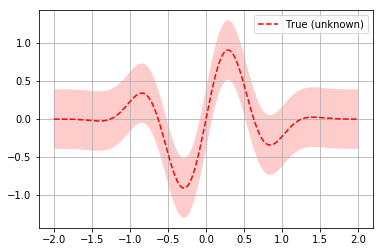

In [4]:
# Plot f(x) + contours
x = np.linspace(-2, 2, 400).reshape(-1, 1)
fx = [f(x_i, noise_level=0.0) for x_i in x]
plt.plot(x, fx, "r--", label="True (unknown)")
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate(([fx_i - 1.9600 * noise_level for fx_i in fx], 
                         [fx_i + 1.9600 * noise_level for fx_i in fx[::-1]])),
         alpha=.2, fc="r", ec="None")
plt.legend()
plt.grid()
plt.show()

In [ ]:
from skopt import forest_minimize
alpha = 0.05
res_quant = forest_minimize(f,                  # the function to minimize
                  [(-2.0, 2.0)],      # the bounds on each dimension of x
                  acq_func="EI",      # the acquisition function
                  base_estimator="RFquantile",
                  n_calls=7,         # the number of evaluations of f 
                  n_random_starts=5,  # the noise level (optional)
                  random_state=123,   # the random seed                      
                  n_jobs=-1,
                  quantiles=alpha)

In [13]:
a = res.models[0]
a.

0.0

In [8]:
"x^*=%.4f, f(x^*)=%.4f" % (res.x[0], res.fun)

'x^*=-0.3076, f(x^*)=-0.7098'